In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('all_data_noCB.csv', index_col=0)
data = data.loc[:,'T':'dm']
data

,T,Mo,Ni,W,Al,Cr,Ti,Si,Cu,Fe,Co,Mn,V,Zr,Hf,Ta,Nb,dm
id,,,,,,,,,,,,,,,,,,
1,1000,20.0,0.00,20.0,20.00,20.00,20.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,6.480000
1,1100,20.0,0.00,20.0,20.00,20.00,20.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,5.504587
2,900,20.0,0.00,0.0,20.00,20.00,20.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,20.00,0.447000
2,1000,20.0,0.00,0.0,20.00,20.00,20.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,20.00,2.770000
2,1100,20.0,0.00,0.0,20.00,20.00,20.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,20.00,5.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1100,0.0,20.00,0.0,10.00,20.00,10.00,0.00,0.0,20.00,20.0,0.00,0.0,0.0,0.0,0.0,0.00,2.011268
120,900,1.8,52.09,0.0,1.28,21.03,0.96,0.41,0.0,19.01,0.0,0.21,0.0,0.0,0.0,0.0,3.22,0.631923
120,1000,1.8,52.09,0.0,1.28,21.03,0.96,0.41,0.0,19.01,0.0,0.21,0.0,0.0,0.0,0.0,3.22,1.819880


In [3]:
font = 'Arial'
font_size = 12

# Dataset Composition

In [4]:
comps = data.loc[:, 'Mo':'Nb']
bools_comps = comps>0
feat_perc = bools_comps.sum(axis=0)*100/218

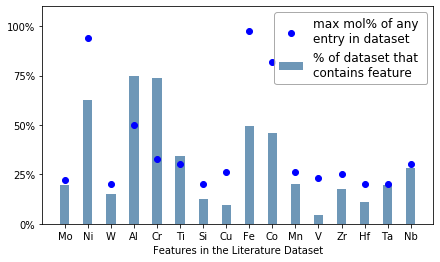

In [5]:
width = 0.4
x = np.arange(len(list(comps)))
fig_perc, ax_perc = plt.subplots()
bw = 130
cbw = (bw/255, bw/255, bw/255, 1) 
bw2 = 110
cbw2 = (bw2/255, bw2/255, bw2/255, 1) 


cbw = (110/255, 151/255, 183/255)
# cbw = 'k'
# 110, 151, 183
cbw2 = cbw

rects1 = ax_perc.bar(x, feat_perc, width, color=cbw, label='% of dataset that \ncontains feature', zorder=-1)
ax_perc.set_xticks(x)
ax_perc.set_xticklabels(list(comps))
ax_perc.set_xlabel('Features in the Literature Dataset')
ax_perc.set_ylim([0, 110])
ax_perc.set_yticks([0, 25, 50, 75, 100])
ax_perc.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])


ax_max = ax_perc
mmc = 'b'
# mmc = (109/255, 219/255, 184/255)
ax_perc.scatter(x, comps.max(), c=mmc, label='max mol% of any \nentry in dataset', zorder=1)

gray = 150
gray = (gray/255, gray/255, gray/255, 1)
ax_perc.legend(loc='upper right', fontsize=12, edgecolor=gray)

fig_perc.set_size_inches(7, 4)
plt.rcParams.update({'font.size': font_size, 'font.family': font, 'figure.dpi': 1200, 'figure.edgecolor':'white'})
fig_perc.savefig('Figures/Fig2.png', dpi=1200)

plt.show()

In [6]:
def get_colors(values, cmap_in, log=False):
    min_v = values.min()
    max_v = values.max()
    
    if log:
        norm_c = mpl.colors.LogNorm(vmin=min_v,vmax=max_v)
    else:
        norm_c = mpl.colors.Normalize(vmin=min_v,vmax=max_v)
    
    cmap_c = mpl.cm.get_cmap(cmap_in)
    colors = {}
    
    for value in values.values:
        color = cmap_c(norm_c(value[0]))
        colors[str(value[0])] = color
    
    return colors, cmap_c, norm_c

# Dataset Mass Change DIstribution

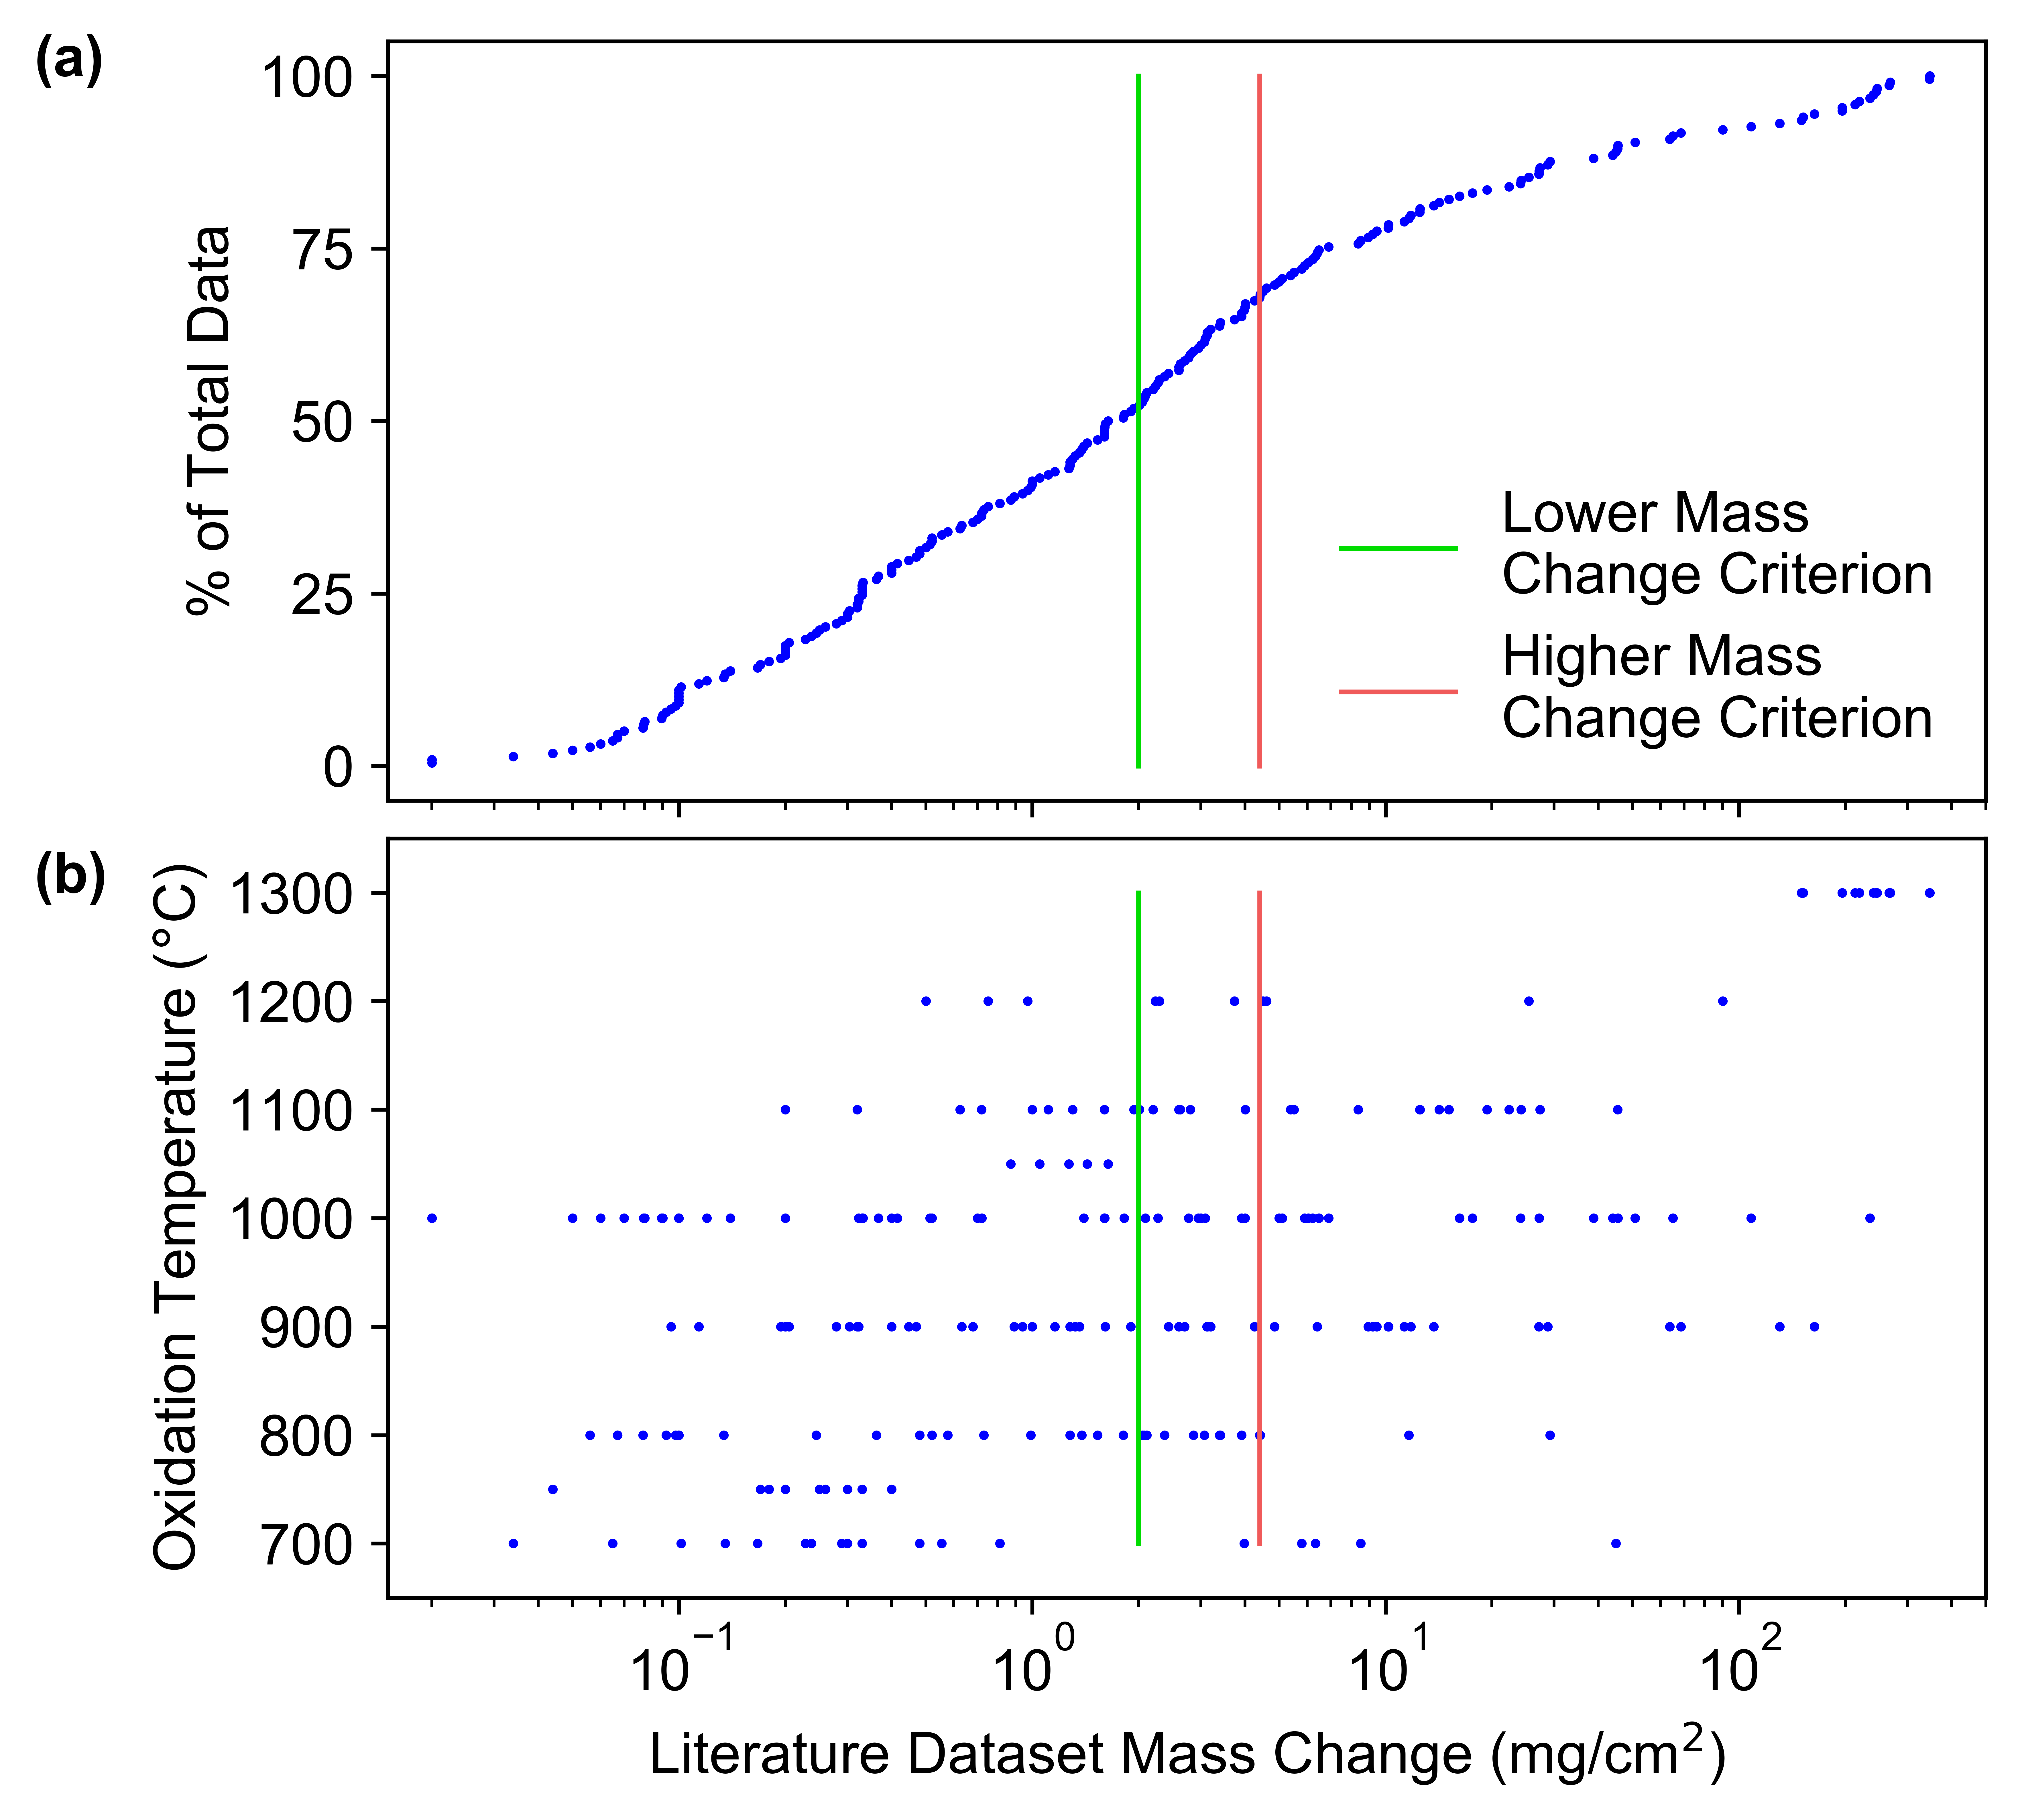

In [7]:
m_a = pd.DataFrame(data.loc[:,['T','dm']])
m_a = m_a.sort_values(by='dm')
temps = list(dict.fromkeys(data['T']).keys())
temps.sort()

colors_T, _, _ = get_colors(pd.DataFrame(temps), 'Dark2', log=False)
colors_T

perc_data = 100*(np.arange(m_a.shape[0])+1)/m_a.shape[0]
m_a['perc'] = perc_data


fig, (ax, axr) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05) 


lw = 1
lmc = (0/255, 220/255, 0/255, 1)
hmc = (240/255, 90/255, 90/255, 1)
lm_line, = ax.plot([2,2], [0, 100], linewidth=lw, color=lmc, label='Lower Mass \nChange Criterion')
hm_line, = ax.plot([4.4,4.4], [0, 100], linewidth=lw, color=hmc, label='Higher Mass \nChange Criterion')
axr.plot([2,2], [700, 1300], linewidth=lw, color=lmc)
axr.plot([4.4,4.4], [700, 1300], linewidth=lw, color=hmc)


for temp in temps:
    curr_data = m_a[m_a["T"]==temp] 
    curr_c = [colors_T[str(temp)] for pt in curr_data.index]
    ax.scatter(curr_data['dm'], curr_data['perc'], c='b', s=1)
    axr.scatter(curr_data['dm'], curr_data['T'], c='b', s=1)

axr.yaxis.set_ticks(np.arange(min(temps), max(temps)+100, 100))
axr.set_ylim([min(temps)-50, max(temps)+50])
ax.yaxis.set_ticks([0, 25, 50, 75, 100])

ax.set_xscale('log')
axr.set_xscale('log')
ax.set_xlim([0.015, 500])
ax.set_ylabel('% of Total Data')
axr.set_ylabel('Oxidation Temperature ($\degree$C)')
axr.set_xlabel('Literature Dataset Mass Change (mg/cm$^2$)')

ax.text(0.0015, 100, "(a)", size=12, weight='bold')
axr.text(0.0015, 1300, "(b)", size=12, weight='bold')

ax.legend(handles=[lm_line, hm_line], loc='lower right', fontsize=12, edgecolor='w')

fig.set_size_inches(6, 6)
plt.rcParams.update({'font.size': 12, 'font.family':'Arial', 'figure.dpi': 1200, 'figure.edgecolor':'white'})
fig.savefig('Figures/Fig3.png', dpi=1200)

plt.show()

# Spearman Coeffs and p-values

In [8]:
feats = list(data)[:-1]
scoef = [0.4, 0.2, -0.43, 0.07, -0.25, -0.22, 0.35, -0.01, -0.19, -0.28, -0.23, -0.07, 0.34, 0.31, 0.35, 0.34, 0.5]
pvals = [5.9E-10, 3E-3, 2.4E-11, 3.2E-1, 1.6E-4, 1.2E-3, 9.2E-8, 8.9E-1, 4.6E-3, 2.6E-5, 7.9E-4, 2.9E-1, 2.7E-7, 2.1E-6, 7.7E-8, 1.8E-7, 1.8E-15]

assert len(feats) == len(scoef) == len(pvals)

sp = pd.DataFrame((feats, scoef, pvals)).T

sp.columns = ['feat', 'sc', 'pv']
# sp

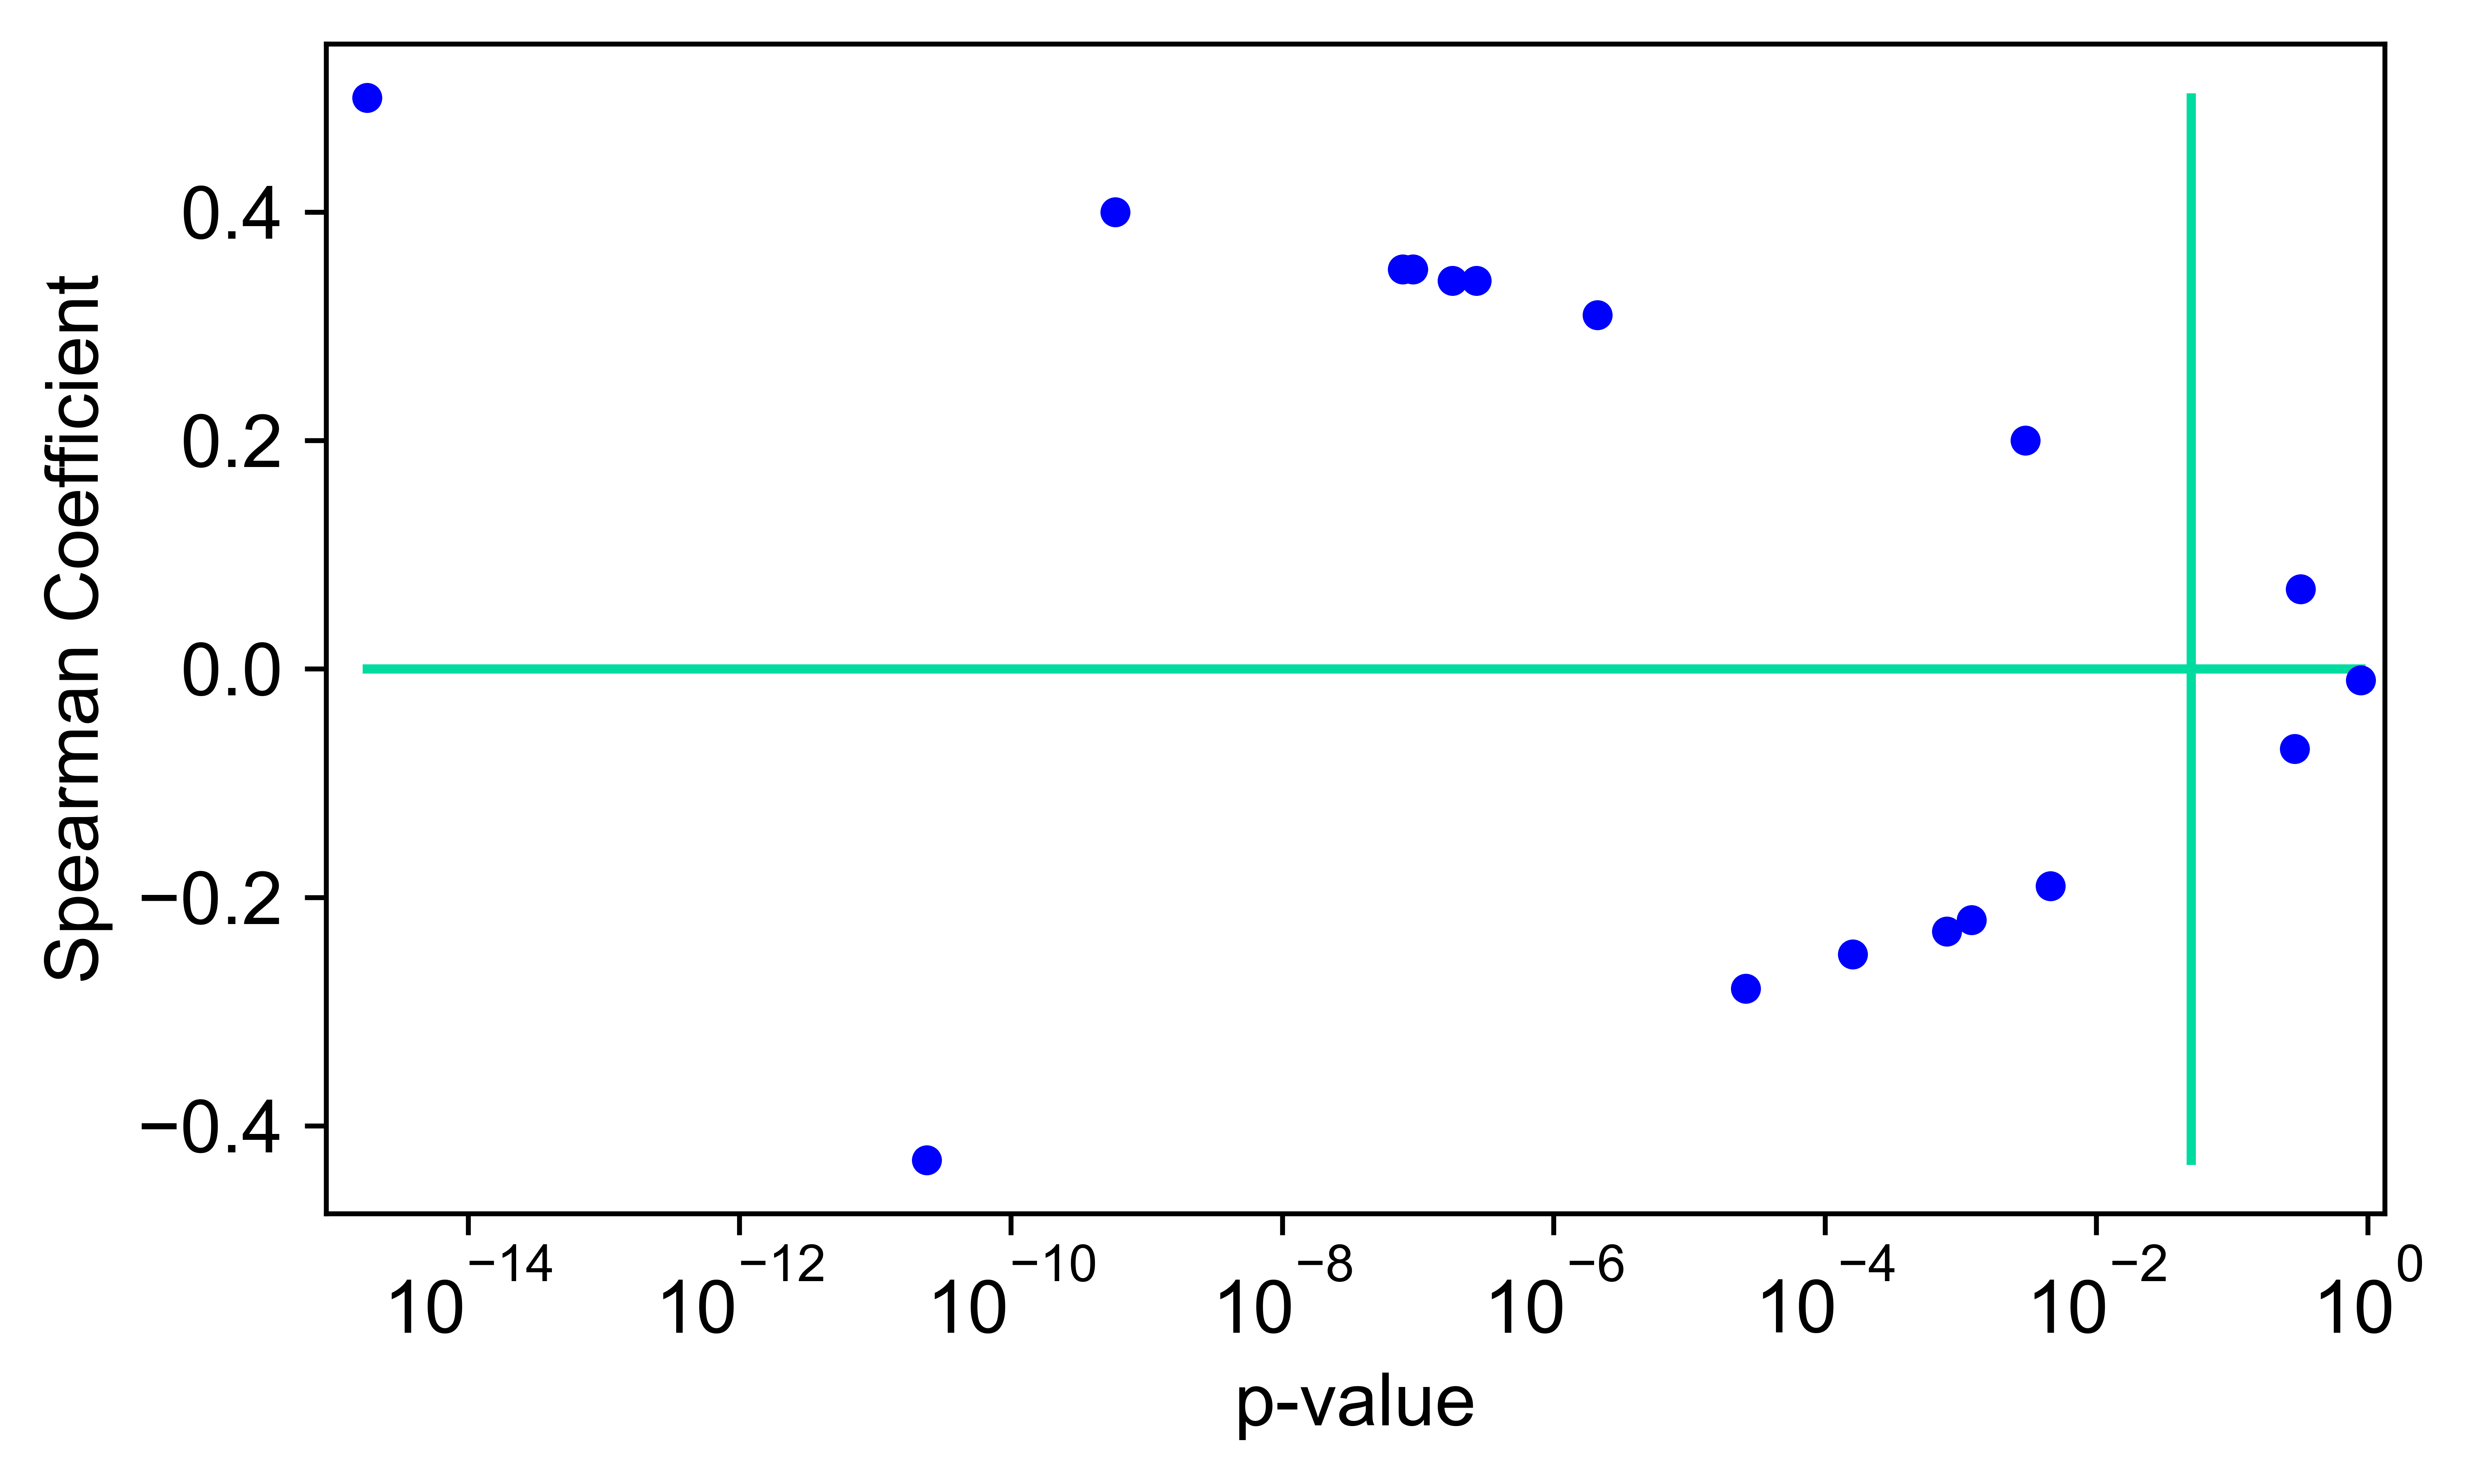

In [9]:
figs, axs = plt.subplots(1, 1)
linc = (0, 219/255, 160/255, 1)

axs.plot([0.05, 0.05], [sp['sc'].min(), sp['sc'].max()], c=linc, zorder=-1)
axs.plot([sp['pv'].min(), sp['pv'].max()], [0, 0], c=linc, zorder=0)
axs.scatter(sp['pv'], sp['sc'], s=15, c='b', zorder=1)

for i, txt in enumerate(feats):
    if sp['sc'][i] > 0: 
        tyc = -100
    else:
        tyc = 20
        
    if sp['pv'][i] > 1e-8:
        txc = -150
    else:
        txc = 20    

axs.set_xscale('log')

xlimoff = 0.5
axs.set_xlim([(1-xlimoff)*sp['pv'].min(), (1+xlimoff)*sp['pv'].max()])
# axs.set_xlim(1e-9, 1e-6)
# axs.set_ylim((0.2, 0.4))
axs.set_xlabel('p-value')
axs.set_ylabel('Spearman Coefficient')
figs.set_size_inches(6, 3.5)

plt.rcParams.update({'font.size': 12, 'font.family':'Arial', 'figure.dpi': 1200, 'figure.edgecolor':'white'})
plt.show()

# Phases Bar Plot

In [10]:
def get_nums_bars(data_in, phases):
    nums = []
    total = data_in['max_phase'].shape[0]
    
    for phase in phases:
        nums = nums + [data_in['max_phase'].str.startswith(phase).sum()]
    
    # add info for misc phases
    phases = phases + ['other']
    others_sum = total- sum(nums) 
    nums = nums + [others_sum]
    
    return phases, nums, total
    
def plot_bars(phases, heights, title):
    
    x = np.arange(len(phases))  # the label locations
    width = 0.6  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, heights, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('# of Alloys')
    ax.set_xticks(x)
    ax.set_xticklabels(phases)
    ax.set_ylim([0, max(heights)+15])
    if title != None:
        ax.set_title(title)
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    autolabel(rects1)
    
    fig.tight_layout()
    fig.set_size_inches(7.5, 5)
    plt.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman', 'figure.dpi': 500, 'figure.edgecolor':'white'})

    plt.show()
    
def plot_bars_mult(phases, heights, title, labels, width, color):
    
#     width = 0.6  # the width of the bars
    x = np.arange(len(phases))*len(heights)*width*1.35  # the label locations

    fig, ax = plt.subplots()
    rects1 = ax.bar(x-width/2, heights[0], width, label=labels[0], color=color[0])
    rects2 = ax.bar(x+width/2, heights[1], width, label=labels[1], color=color[1])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('# of Alloys')
    ax.set_xlabel('Phases Retrived from Thermo-Calc Simulations')
    ax.set_xticks(x)
    ax.set_xticklabels(phases)
    ax.set_yticklabels([])
    ax.set_ylim([0, max(max(heights))*1.15])
    if title != None:
        ax.set_title(title)
    
    def autolabel(rects, color):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', color=color, fontsize=14)
    
    autolabel(rects1, color[0])
    autolabel(rects2, color[1])
    
    ax.legend(edgecolor='w', loc='upper left', fontsize=font_size)
    
    fig.tight_layout()
    fig.set_size_inches(6, 3)
    plt.rcParams.update({'font.size': font_size, 'font.family': font, 'figure.dpi': 1200, 'figure.edgecolor':'white'})
    fig.savefig('Figures/Fig4.png', dpi=1200)
    plt.show()
    

In [11]:
phases = ['BCC', 'FCC', 'HCP']
sim_comps_data = pd.read_csv('Table_S2.csv', index_col=0)
data = sim_comps_data
sc_1_step = data[(data['solidus']>1200) & (data['max_phase'].str.startswith('BCC') | data['max_phase'].str.startswith('FCC') 
                    | data['max_phase'].str.startswith('HCP')) & (data['max_phase_fraction']>0.7) & (data['freeze_range']<200)]

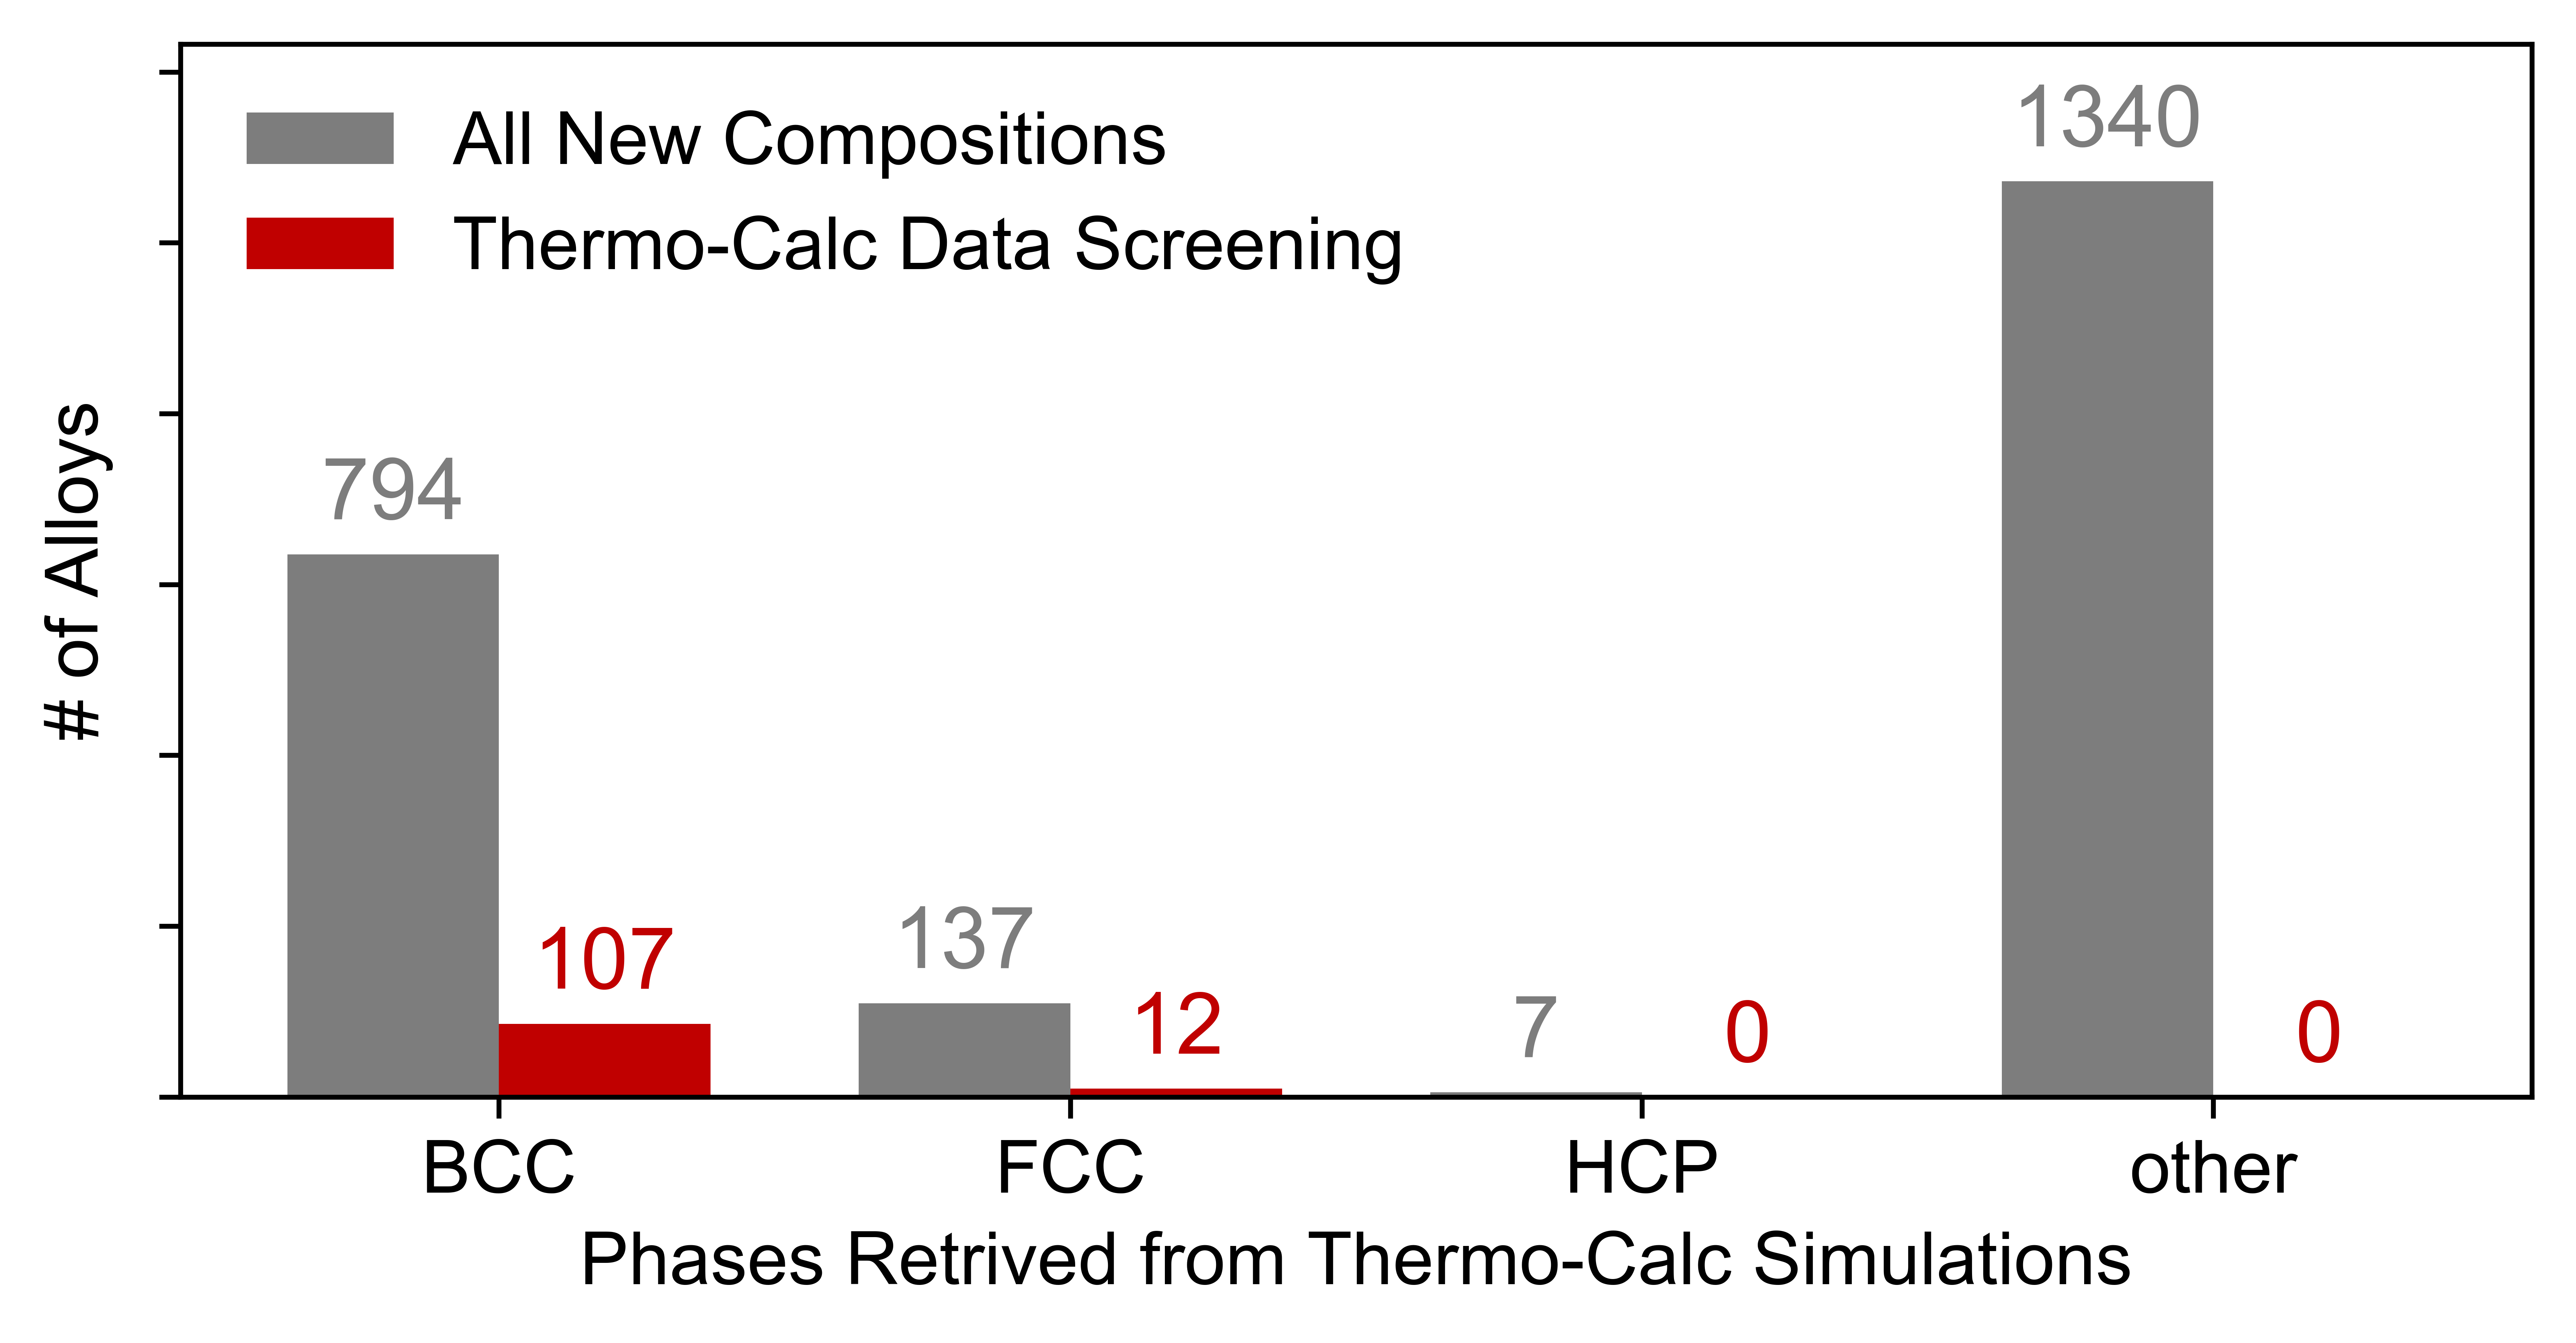

In [12]:
g1 = 80/255
g2 = 125/255

colors = [(g2, g2, g2,1), (192/255, 0, 0, 1)]

phases1, heights1, total_1 = get_nums_bars(sc_1_step, phases)
phases2, heights2, total_2 = get_nums_bars(data, phases)

plot_bars_mult(phases1, [heights2, heights1], None, ['All New Compositions', 'Thermo-Calc Data Screening'], 0.5, colors)

# Oxidation Data Bar Plot

In [13]:
labels = ['L1', 'L2', 'L3', 'L4', 'L5', 'H1', 'H2']
fo1 = [1.41, 1.32, 1.55, 1.37, 199.36, 8.55, 290.89]
f1e = [0.191, 0.226, 0.190, 0.289, 0.735, 0.190, 3.208]

fo2 = [1.47, -0.10, -4.28, 0.18, 152.35, 4.52, 186.40]
f2e = [0.101, 0.158, 0.168, 0.170, 0.192, 0.125, 0.376]

fo3 = [2.08, -0.38, -0.51, 0.02, 0, 0, 192.13]
f3e = [0.026, 0.151, 0.159, 0.094, 0, 0, 0.571]

TGA_1 = [0.6137, 0, 0, 0, 0, 0, 0]
TGA_2 = [0.7474, 0.2457, 0.5229, 0.7552, 0, 0, 0]

pred = [0.63, 0.46, 0.72, 1.87, 0.95, 5.09, 6.22]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

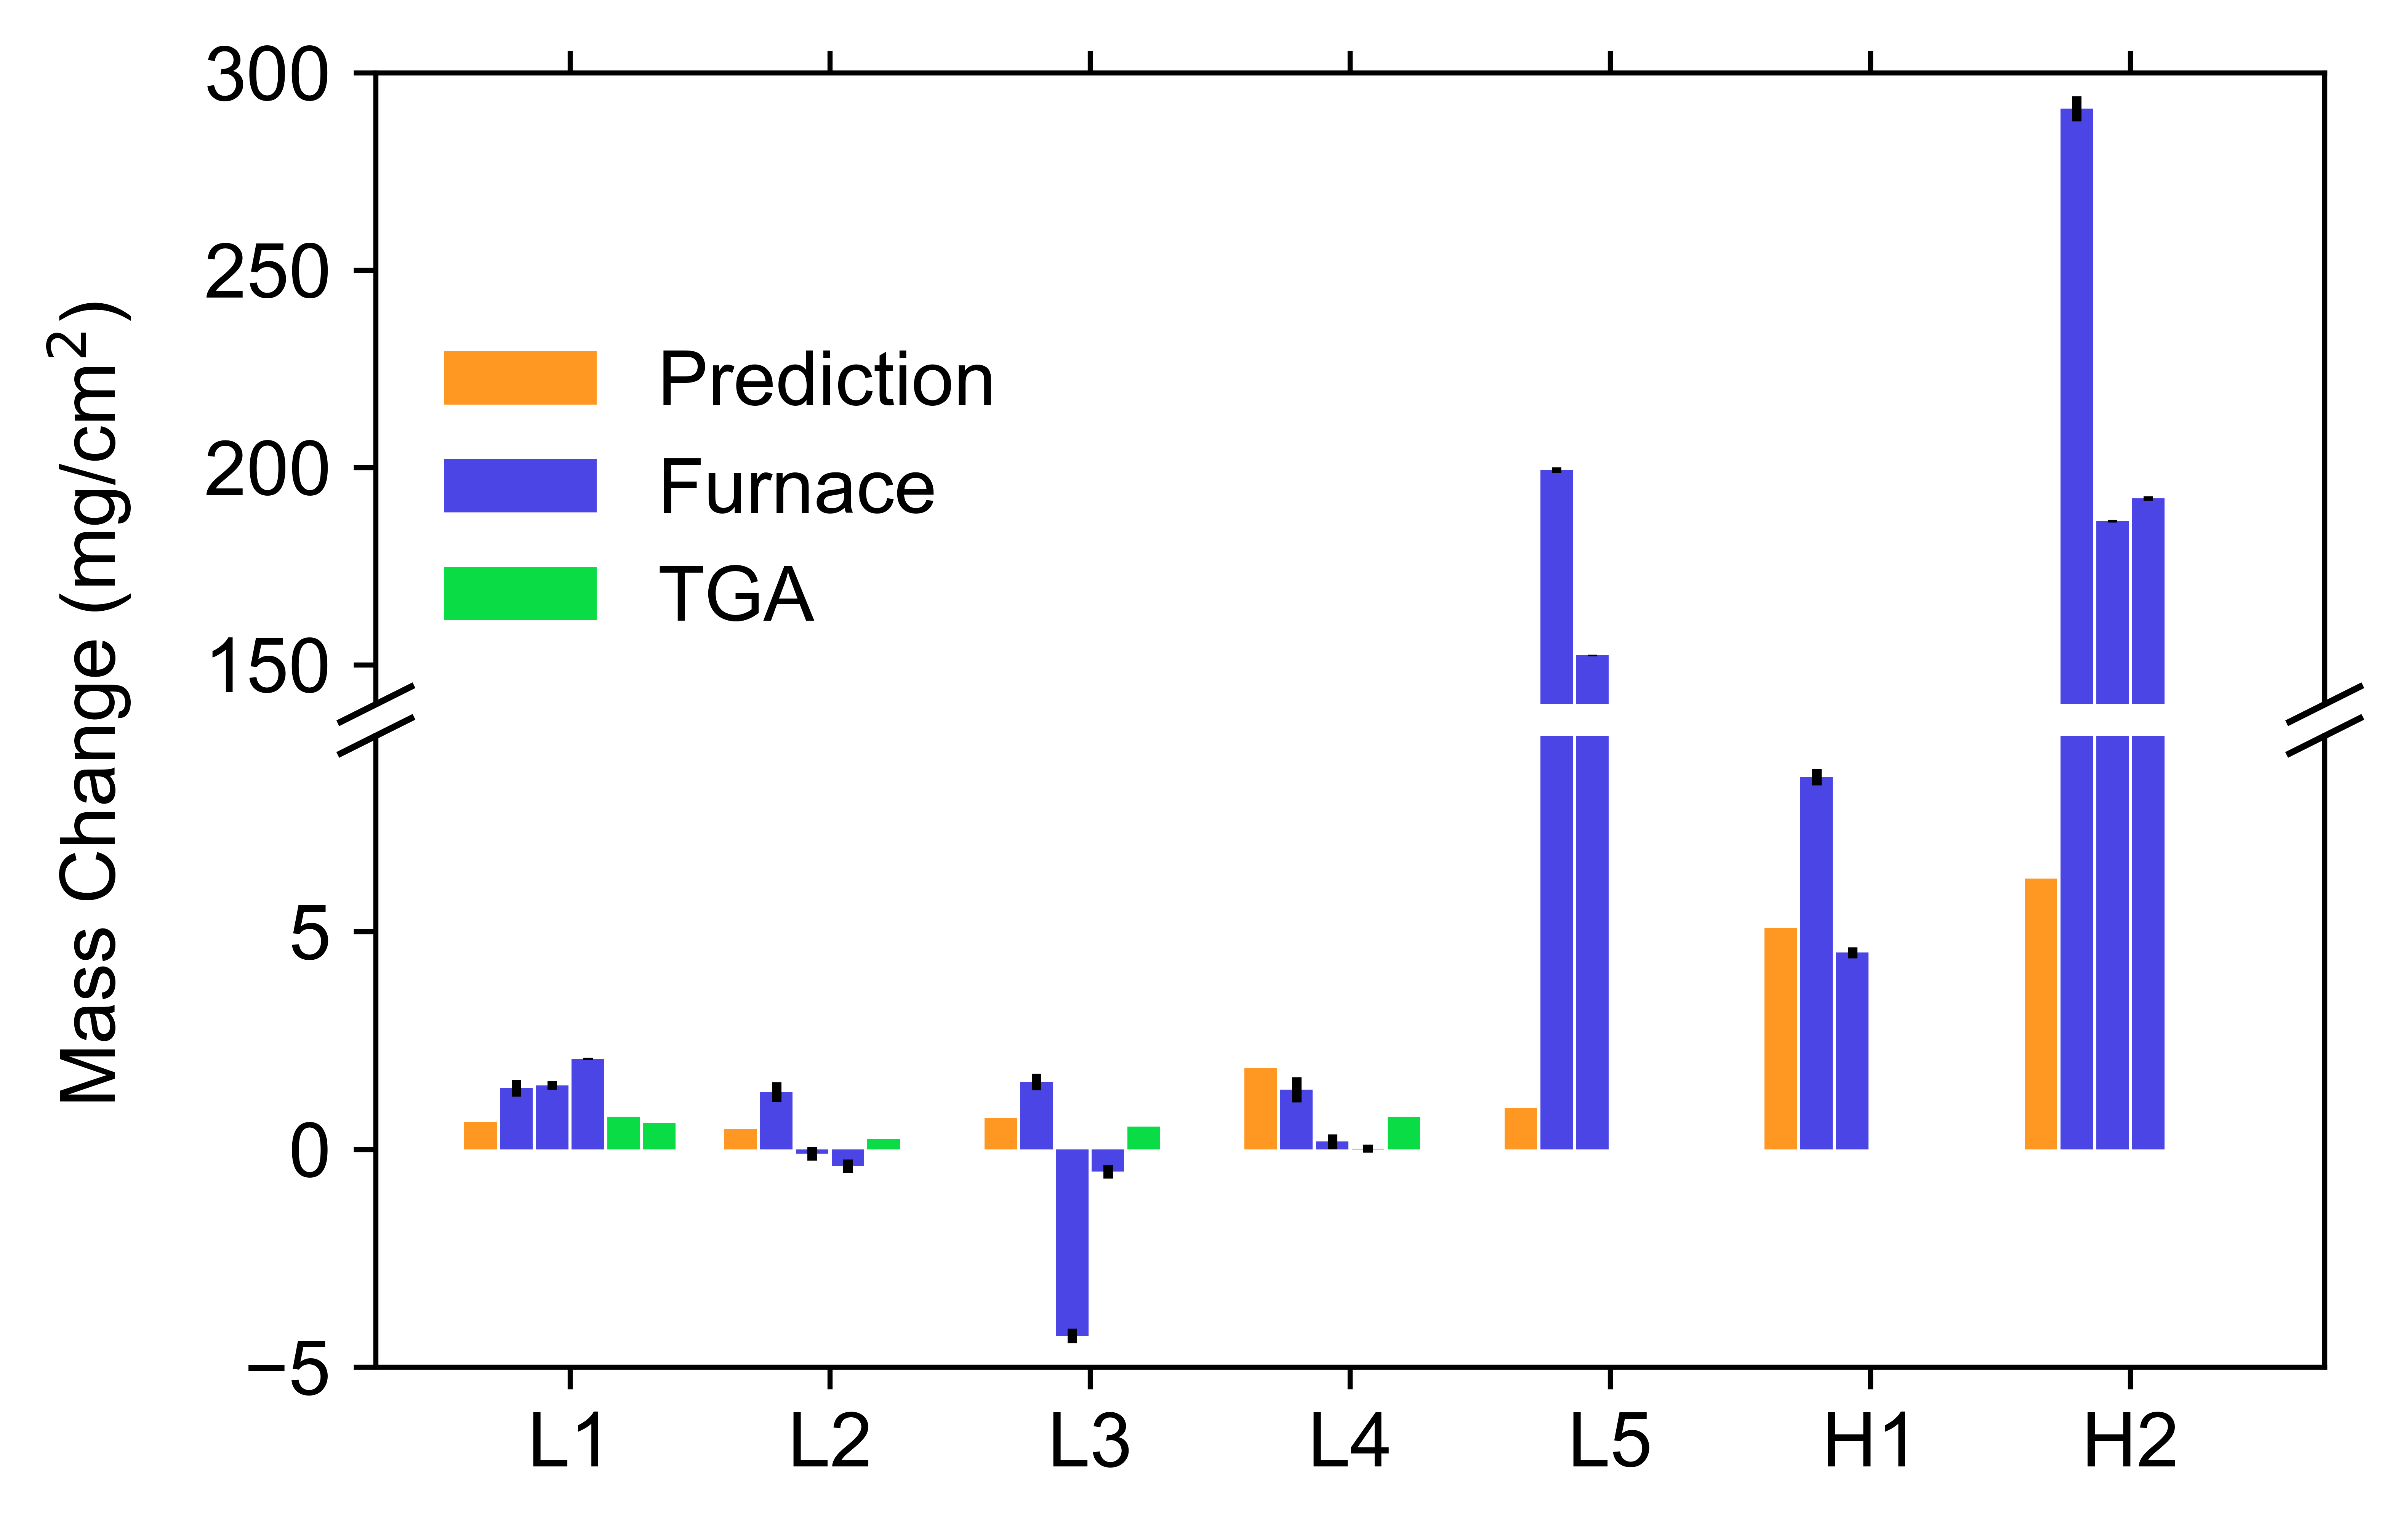

In [14]:
xs = x
fo1s = fo1
f1es = f1e

fo2s = fo2
f2es = f2e

fo3s = fo3
f3es = f3e

width = 0.125  # the width of the bars

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

col1 = (75/255, 69/255, 230/255, 1)
col2 = (9/255, 220/255, 69/255, 1)
col3 = (255/255, 152/255, 35/255, 1)

ax1.bar(xs - 2.5*width*1.1, pred, width, label='Prediction', color=col3)
ax1.bar(xs - 1.5*width*1.1 , fo1s, width, label='Furnace', yerr=f1es, color=col1)
ax1.bar(xs - 0.5*width*1.1, fo2s, width, label=None, yerr=f2es, color=col1)
ax1.bar(xs + 0.5*width*1.1, fo3s, width, label=None, yerr=f3es, color=col1)
ax1.bar(xs + 1.5*width*1.1, TGA_2, width, label='TGA', color=col2)
ax1.bar(xs + 2.5*width*1.1, TGA_1, width, label=None, color=col2)

ax2.bar(xs - 2.5*width*1.1, pred, width, label='Prediction', color=col3)
ax2.bar(xs - 1.5*width*1.1 , fo1s, width, label='Furnace', yerr=f1es, color=col1)
ax2.bar(xs - 0.5*width*1.1, fo2s, width, label=None, yerr=f2es, color=col1)
ax2.bar(xs + 0.5*width*1.1, fo3s, width, label=None, yerr=f3es, color=col1)
ax2.bar(xs + 1.5*width*1.1, TGA_2, width, label='TGA', color=col2)
ax2.bar(xs + 2.5*width*1.1, TGA_1, width, label=None, color=col2)



# ax1.set_ylim(-5, 9.5)  # outliers only
# ax2.set_ylim(140, 300)  # most of the data
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(140, 300)  # outliers only
ax2.set_ylim(-5, 9.5)  # most of the data

# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
      
ax1.set_xticks(xs)
ax1.set_xticklabels(labels)

ax1.set_ylabel('Mass Change (mg/cm$^2$)')
ax1.yaxis.set_label_coords(-0.125, 0.0)
# ax1.legend()
ax1.legend(edgecolor='w', loc='lower left')

fig.set_size_inches(5.5, 3.75)

plt.rcParams.update({'font.size': font_size, 'font.family': font, 'figure.dpi': 1200})
fig.savefig('Figures/Fig6.png', dpi=1200)

plt.show()